#LabWeek9: Prevent Overfitting - Part I

## Importing Dataset: IMDB

Name: Om Makwana

Student ID: 101414422

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Note:** We first encountered this dataset in `LabWeek5`. You can refer to that notebook for clarification on the text-to-numbers decoding process. Through vectorizing process we turn text data into vectors.

**Perform some sanity checks on the dataset:** For example, find the `shape` of the dataset and print samples to make sense of the data.

In [2]:
#TODO: your code here


print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


print("\nSample from x_train (first 20 elements):")
print(x_train[0][:20])


print("\nCorresponding label:", y_train[0])


print("\nNumber of non-zero elements in the sample:", np.count_nonzero(x_train[0]))


print("\nOriginal review (first 50 words):")
print([word for word, word_index in imdb.get_word_index().items() if word_index < 50])

train_lengths = [len(seq) for seq in train_data]
print("\nLength of shortest review in training set:", min(train_lengths))
print("Length of longest review in training set:", max(train_lengths))


print("\nLabel distribution in training set:")
print("Positive reviews:", np.sum(y_train == 1))
print("Negative reviews:", np.sum(y_train == 0))


Shape of x_train: (25000, 10000)
Shape of x_test: (25000, 10000)
Shape of y_train: (25000,)
Shape of y_test: (25000,)

Sample from x_train (first 20 elements):
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]

Corresponding label: 1.0

Number of non-zero elements in the sample: 120

Original review (first 50 words):
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
['has', 'with', 'one', 'have', "it's", 'like', 'i', 'who', 'he', 'an', 'as', 'it', 'is', 'in', 'if', 'but', 'on', 'of', 'or', 'her', 'his', 'all', 'this', 'not', 'you', 'a', 'at', 'so', 'there', 'out', 'for', 'be', 'br', 'by', 'they', 'just', 'the', 'from', 'was', 'and', 'to', 'film', 'about', 'what', 'movie', 'that', 'some', 'good', 'are']

Length of shortest review in training set: 11
Length of longest review in training set: 2494

Label distribution in training set:
Positive reviews: 12500
Negative reviews: 12500


## Fighting overfitting -  Reducing the network's size


The general workflow to find an appropriate model size is to start with relatively few layers and
parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the
validation loss.



**Note:** we use `test set` as our `validation set`.

**Complete the following code for `original model` architecture**

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#TODO: add one hidden layer with 16 units with proper activation function
original_model.add(layers.Dense(16, activation='relu'))
#TODO: add the output layer. Remember our task is binary classificaion, whether a review is 0:negative or 1:positive.
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
original_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

**Define another model with fewer parameters. 4 units in each hidden layer.**

In [4]:
smaller_model = models.Sequential()
#TODO: add hidden/ouput layers and compile the smaller model


smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))


smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

smaller_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │          40,004 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,029 (156.36 KB)

 Trainable params: 40,029 (156.36 KB)

 Non-trainable params: 0 (0.00 B)


**Train (1) original_model and (2) smaller_model seperately for `epochs=20` and `batch_size=512`. Also pass `x_test` and `y_test` as `validation_data`.**

In [5]:
#TODO: your code here for training original_model
original_hist = original_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - acc: 0.7351 - loss: 0.5549 - val_acc: 0.8702 - val_loss: 0.3489
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.9031 - loss: 0.2833 - val_acc: 0.8888 - val_loss: 0.2853
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - acc: 0.9250 - loss: 0.2109 - val_acc: 0.8804 - val_loss: 0.2967
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9413 - loss: 0.1712 - val_acc: 0.8802 - val_loss: 0.2997
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9448 - loss: 0.1540 - val_acc: 0.8818 - val_loss: 0.3015
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9557 - loss: 0.1293 - val_acc: 0.8785 - val_loss: 0.3189
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9620 - loss: 0.1136 - val_acc: 0.8689 - val_loss: 0.3659
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.9660 - loss: 0.1063 - val_acc: 0.8733 - val_loss: 0.3574
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.972

In [6]:
#TODO: your code here for training original_model
smaller_hist = smaller_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - acc: 0.6633 - loss: 0.6393 - val_acc: 0.8117 - val_loss: 0.5351
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.8601 - loss: 0.4913 - val_acc: 0.8724 - val_loss: 0.4345
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.8955 - loss: 0.3837 - val_acc: 0.8815 - val_loss: 0.3597
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9119 - loss: 0.3044 - val_acc: 0.8853 - val_loss: 0.3149
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9212 - loss: 0.2524 - val_acc: 0.8892 - val_loss: 0.2912
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9311 - loss: 0.2153 - val_acc: 0.8901 - val_loss: 0.2810
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.9369 - loss: 0.1943 - val_acc: 0.8889 - val_loss: 0.2788
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9432 - loss: 0.1752 - val_acc: 0.8900 - val_loss: 0.2779
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.9489

**`orginal_hist` and `smaller_hist` are `objects` returned after training the models.**
- We can get access to the `history` attribute of `origial_hist` object through dot operator.
- TODO: The history attribute is a data structure of type `dictionary` containing data about everything that happened during training. Show the `keys` of this `dictionary`.

In [7]:
print(original_hist.history)
#TODO: print out the keys of the output dictionary
print("Keys in original_hist.history:")
print(original_hist.history.keys())


{'acc': [0.8142799735069275, 0.9050400257110596, 0.9233199954032898, 0.9369999766349792, 0.9435999989509583, 0.951200008392334, 0.9587200284004211, 0.9634799957275391, 0.9684000015258789, 0.973039984703064, 0.9752799868583679, 0.9809200167655945, 0.98471999168396, 0.9886000156402588, 0.9892799854278564, 0.991159975528717, 0.9943600296974182, 0.9955199956893921, 0.9939600229263306, 0.9973599910736084], 'loss': [0.4616583585739136, 0.2683772146701813, 0.21106372773647308, 0.1773083657026291, 0.1554754227399826, 0.13776354491710663, 0.12125467509031296, 0.10885385423898697, 0.0948294922709465, 0.0831131860613823, 0.07418743520975113, 0.06312214583158493, 0.053389690816402435, 0.0446045882999897, 0.03979898989200592, 0.03275999054312706, 0.026731710880994797, 0.021706797182559967, 0.022385651245713234, 0.01362859271466732], 'val_acc': [0.8701599836349487, 0.8888000249862671, 0.8804000020027161, 0.8802000284194946, 0.8818399906158447, 0.8785200119018555, 0.8688799738883972, 0.87331998348236

**Plot `val_loss` vs. epochs for both models in one plot**

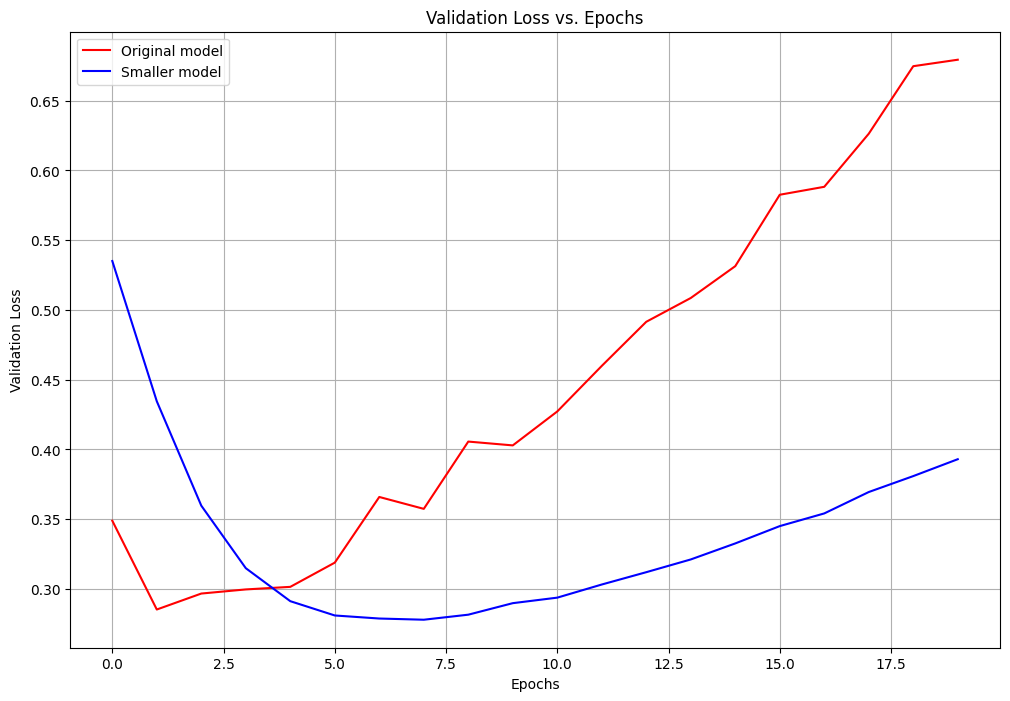

In [8]:
from matplotlib import pyplot as plt
#TODO: your code here

from matplotlib import pyplot as plt


plt.figure(figsize=(12, 8))


plt.plot(original_hist.epoch, original_hist.history['val_loss'], 'r', label='Original model')

plt.plot(smaller_hist.epoch, smaller_hist.history['val_loss'], 'b', label='Smaller model')


plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.show()


**Plot training `loss` vs. epochs for both models in one plot**

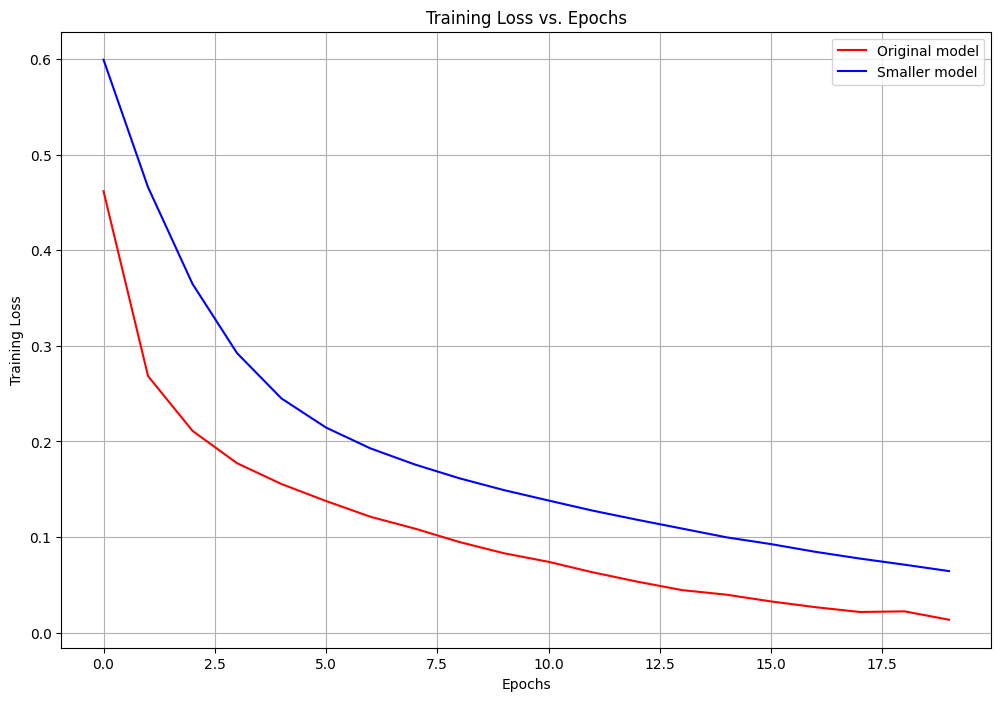

In [9]:
#TODO: your code hereß
from matplotlib import pyplot as plt


plt.figure(figsize=(12, 8))

plt.plot(original_hist.epoch, original_hist.history['loss'], 'r', label='Original model')

plt.plot(smaller_hist.epoch, smaller_hist.history['loss'], 'b', label='Smaller model')

plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)

plt.show()


**Questions:** Which model overfits earlier? How can you see the size of the model on overfitting?

**Answer:** TODO


To determine which model overfits earlier and see the effect of model size on overfitting:

Compare the validation loss curves:

Plot the validation loss vs. epochs for both the original (larger) model and the smaller model.The model that shows an earlier increase in validation loss while training loss continues to decrease is overfitting earlier.

Observe the gap between training and validation performance:
A larger gap between training and validation performance (accuracy or loss) indicates more overfitting.

Model complexity analysis:

The original model, being larger, has more parameters and is more prone to overfitting, especially with limited training data2.The smaller model, with fewer parameters, is less likely to overfit as quickly.

Learning curves:

Plot learning curves showing training and validation error as a function of training set size2.The model that shows a larger gap between training and validation error curves with less data is overfitting earlier.

To visualize the effect of model size on overfitting:

Compare performance metrics:

Plot training and validation accuracy/loss for both models on the same graph. The larger model may show higher training accuracy but worse validation performance compared to the smaller model.

Vary model complexity:

Experiment with different model sizes (e.g., number of layers or units) and observe how it affects the overfitting behavior4.Larger models are more likely to overfit, especially with limited data.


Regularization impact:

Apply regularization techniques (e.g., L1/L2 regularization, dropout) to both models.The larger model may show more significant improvement with regularization, indicating it was overfitting more severely2.



**Now define a very large model (e.g., with 512 units in hidden layer) and compare the `loss` and `val_loss` of this big model and the `original model` and `smaller_model`.**

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 587ms/step - acc: 0.6690 - loss: 0.5965 - val_acc: 0.8176 - val_loss: 0.4009
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - acc: 0.8865 - loss: 0.2787 - val_acc: 0.8884 - val_loss: 0.2680
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - acc: 0.9159 - loss: 0.2146 - val_acc: 0.8571 - val_loss: 0.3559
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 365ms/step - acc: 0.9392 - loss: 0.1551 - val_acc: 0.8732 - val_loss: 0.3156
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - acc: 0.9589 - loss: 0.1155 - val_acc: 0.8663 - val_loss: 0.3278
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 473ms/step - acc: 0.9727 - loss: 0.0804 - val_acc: 0.8823 - val_loss: 0.3545
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - acc: 0.9819 - loss: 0.0630 - val_acc: 0.8622 - val_loss: 0.3500
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - acc: 0.9939 - loss: 0.0314 - val_acc: 0.8804 - val_loss: 0.3783
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 338ms/

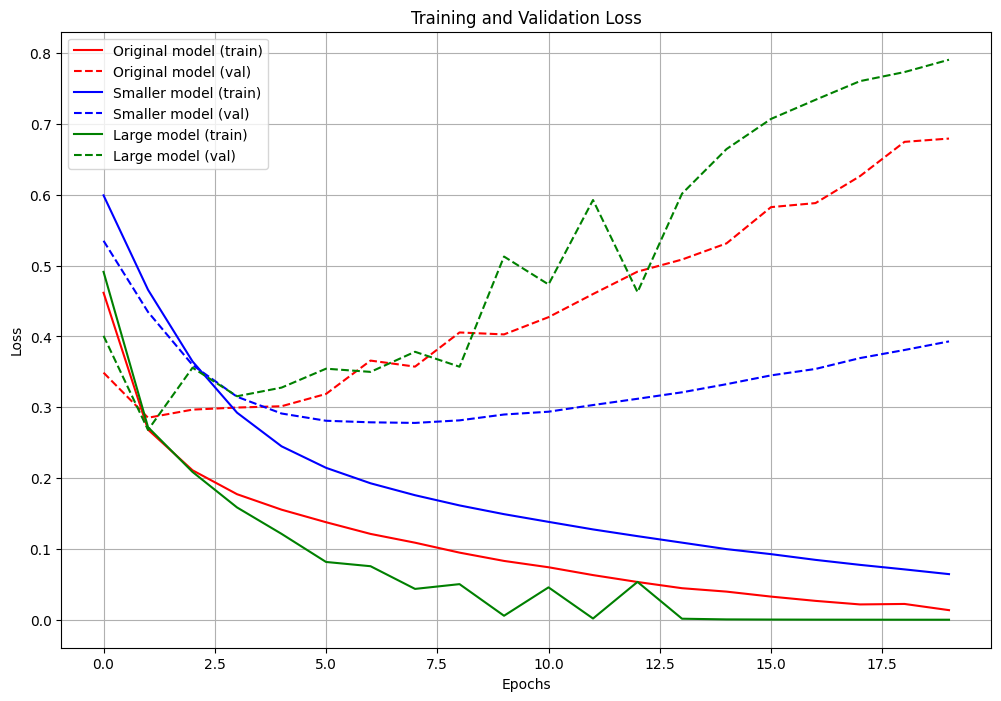

In [10]:
from keras import models
from keras import layers


large_model = models.Sequential()
large_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
large_model.add(layers.Dense(512, activation='relu'))
large_model.add(layers.Dense(1, activation='sigmoid'))

large_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

large_hist = large_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)


plt.figure(figsize=(12, 8))

# Original model
plt.plot(original_hist.epoch, original_hist.history['loss'], 'r', label='Original model (train)')
plt.plot(original_hist.epoch, original_hist.history['val_loss'], 'r--', label='Original model (val)')

# Smaller model
plt.plot(smaller_hist.epoch, smaller_hist.history['loss'], 'b', label='Smaller model (train)')
plt.plot(smaller_hist.epoch, smaller_hist.history['val_loss'], 'b--', label='Smaller model (val)')

# Large model
plt.plot(large_hist.epoch, large_hist.history['loss'], 'g', label='Large model (train)')
plt.plot(large_hist.epoch, large_hist.history['val_loss'], 'g--', label='Large model (val)')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


**Discuss the results**

**Answer:** TODO

## Fighting overfitting - Adding weight regularization


A common way to mitigate overfitting is to put constraints on the complexity
of a network by forcing its weights to only take small values. This is called
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments.


**Complere the model below**

In [11]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))

l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training
than at test time.



**Train the model with regularization and compare the validation loss between this model and the `original_model` and `smaller model`.**

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - acc: 0.7275 - loss: 0.6104 - val_acc: 0.8777 - val_loss: 0.3928
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - acc: 0.9017 - loss: 0.3371 - val_acc: 0.8899 - val_loss: 0.3382
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9187 - loss: 0.2807 - val_acc: 0.8764 - val_loss: 0.3482
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.9301 - loss: 0.2469 - val_acc: 0.8882 - val_loss: 0.3302
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9386 - loss: 0.2269 - val_acc: 0.8834 - val_loss: 0.3400
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.9443 - loss: 0.2176 - val_acc: 0.8786 - val_loss: 0.3532
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.9447 - loss: 0.2092 - val_acc: 0.8660 - val_loss: 0.3932
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9449 - loss: 0.2084 - val_acc: 0.8670 - val_loss: 0.3967
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - acc: 0.952

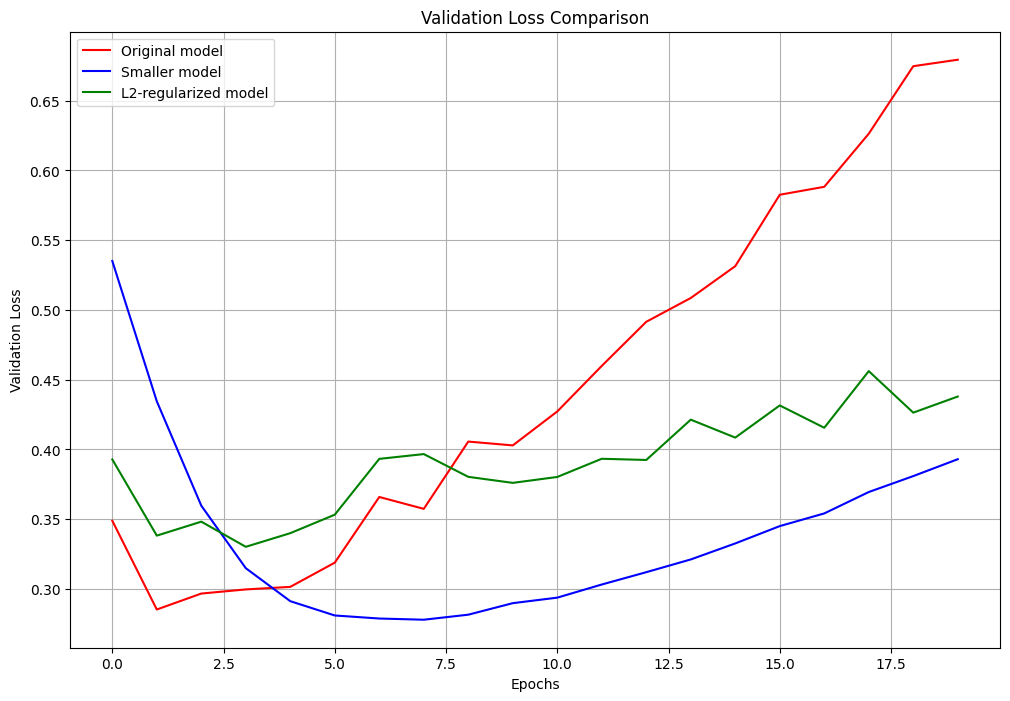

Final validation loss:
Original model: 0.6793
Smaller model: 0.3930
L2-regularized model: 0.4379


In [13]:
l2_hist = l2_model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)


plt.figure(figsize=(12, 8))

# Original model
plt.plot(original_hist.epoch, original_hist.history['val_loss'], 'r', label='Original model')

# Smaller model
plt.plot(smaller_hist.epoch, smaller_hist.history['val_loss'], 'b', label='Smaller model')

# L2-regularized model
plt.plot(l2_hist.epoch, l2_hist.history['val_loss'], 'g', label='L2-regularized model')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

plt.show()


print("Final validation loss:")
print(f"Original model: {original_hist.history['val_loss'][-1]:.4f}")
print(f"Smaller model: {smaller_hist.history['val_loss'][-1]:.4f}")
print(f"L2-regularized model: {l2_hist.history['val_loss'][-1]:.4f}")


**Note:** As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [14]:
from keras import regularizers


regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)

## Recap

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout. (next session)

**Observation 1:** The bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large
difference between the training and validation loss).

**Observation 2:** The model with L2 regularization has become much more resistant to overfitting than the reference model,
even though both models have the same number of parameters.

**Observation 1** is spot on. Larger networks have more capacity to memorize the training data, leading to:

Faster decrease in training loss.

Increased risk of overfitting (larger gap between training and validation loss).

Potentially worse generalization to new data.

Additional observations:

Smaller models often have better generalization when data is limited.

Regularization techniques can allow larger models to perform well without overfitting.

The optimal model size often depends on the amount and complexity of the data.

Monitoring validation loss is crucial to detect overfitting early.


**Observation 2**: The model with L2 regularization has indeed become much more resistant to overfitting compared to the reference model, despite having the same number of parameters. This demonstrates the power of regularization techniques. Here's why this happens:

Weight constraint: L2 regularization adds a penalty term to the loss function that is proportional to the square of the weights. This encourages the model to use smaller weights.

Smoother decision boundaries: Smaller weights lead to smoother decision boundaries, which are less likely to fit noise in the training data.

Feature importance: L2 regularization encourages the model to use all input features a little bit rather than relying heavily on a few features. This can lead to better generalization.

Reduced sensitivity: The regularized model becomes less sensitive to small variations in the input, which helps in generalizing to unseen data.

Balanced learning: While the regularized model might not fit the training data as closely (higher training loss), it often performs better on validation data (lower validation loss), indicating better generalization.